## 1. Project Preparation

### 1.1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as skl
import matplotlib as mpl
import seaborn as sns
import sys

print(f'python version: {sys.version}')
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'scipy version: {sp.__version__}')
print(f'sklearn version: {skl.__version__}')
print(f'matplotlib version: {mpl.__version__}')
print(f'seaborn version: {sns.__version__}')

python version: 3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
pandas version: 1.0.1
numpy version: 1.17.2
scipy version: 1.3.1
sklearn version: 0.22.2
matplotlib version: 3.1.3
seaborn version: 0.9.0


/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.2. Korean Font Settings 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
import os, copy, sys, platform

system = platform.system()

if system == 'Windows':
    datapath = os.getcwd() + '\\'
    imagepath = datapath + 'images\\'

    # ttf 폰트 전체개수
    font_list[:10]

    f = [f.name for f in fm.fontManager.ttflist]
    f[:10]

    [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

    path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
    font_name = fm.FontProperties(fname=path, size=50).get_name()

    print(font_name)
    plt.rc('font', family=font_name)
    print("# matplotlib 한글 사용 가능")

elif system == 'Linux':
    datapath = os.getcwd() + '//'
    imagepath = datapath + 'images//'
  
#     !apt-get update -qq
#     !apt-get install fonts-nanum* -qq

    path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
    font_name = fm.FontProperties(fname=path, size=10).get_name()

    print(font_name)
    plt.rc('font', family=font_name)

    fm._rebuild()
    mpl.rcParams['axes.unicode_minus'] = False
    print("# matplotlib 한글 사용 가능")

else:
    sys.exit('ERROR: Sorry, my code has compatibility with Windows and Linux only.')

NanumGothic
# matplotlib 한글 사용 가능


### 1.3. Visualization settings

In [3]:
plt.style.use('seaborn-whitegrid')
sns.set_context('talk')
plt.rcParams['font.family']='NanumGothic'
%matplotlib inline

## 2. Load Data

### 2.1. Read data file

In [4]:
df = pd.read_csv('6_pld_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       490 non-null    float64
 1   Y       490 non-null    float64
dtypes: float64(2)
memory usage: 7.8 KB


### 2.2. Plot: raw data

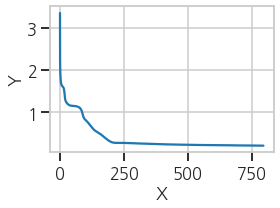

In [5]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(df['X'], df['Y'])
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.tight_layout()
plt.savefig('6_pld_2.png')

## 3. Detect Plateau

### 3.1. 1st, 2nd and 3rd Derivatives: raw

![ ](6_pld_3.png)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:1273: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


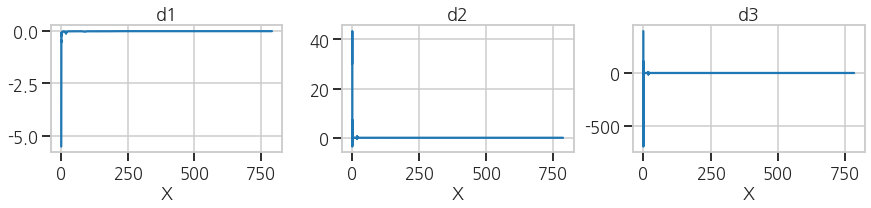

In [6]:
d1 = np.diff(df['Y'])/np.diff(df['X'])
d2 = np.diff(d1)/np.diff(df['X'].iloc[:-1])
d3 = np.diff(d2)/np.diff(df['X'].iloc[:-2])

fig, ax = plt.subplots(ncols=3, figsize=(12, 3))
ax[0].plot(df['X'].iloc[:-1], d1)
ax[1].plot(df['X'].iloc[:-2], d2)
ax[2].plot(df['X'].iloc[:-3], d3)

ax[0].set_title('d1')
ax[1].set_title('d2')
ax[2].set_title('d3')

ax[0].set_xlabel('X')
ax[1].set_xlabel('X')
ax[2].set_xlabel('X')

plt.tight_layout()
plt.savefig('6_pld_4.png')

### 3.2. Magnify regions (Y: 0~400)

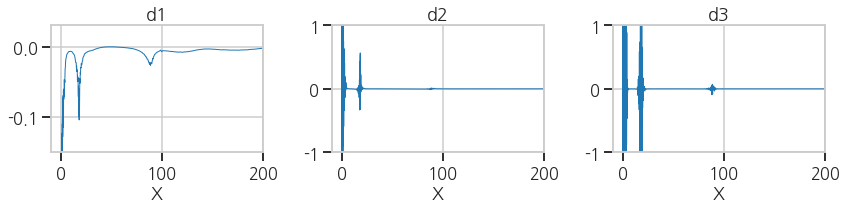

In [7]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 3), sharex=True)
ax[0].plot(df['X'].iloc[:-1], d1, lw=1)
ax[1].plot(df['X'].iloc[:-2], d2, lw=1)
ax[2].plot(df['X'].iloc[:-3], d3, lw=1)

ax[0].set_xlim((-10,200))
ax[0].set_ylim((-0.15, 0.03))
ax[1].set_ylim((-1, 1))
ax[2].set_ylim((-1, 1))

ax[0].set_title('d1')
ax[1].set_title('d2')
ax[2].set_title('d3')

ax[0].set_xlabel('X')
ax[1].set_xlabel('X')
ax[2].set_xlabel('X')

plt.tight_layout()
plt.savefig('6_pld_5.png')

### 3.3. Transpose (vs Y)

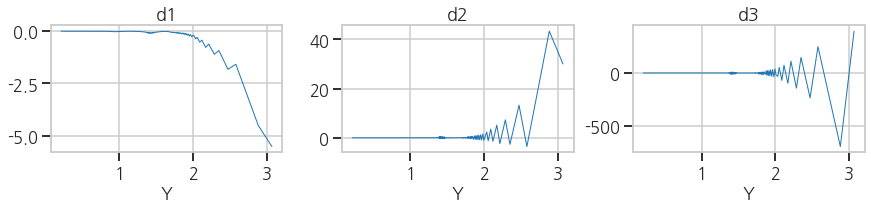

In [8]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 3), sharex=True)
ax[0].plot(df['Y'].iloc[:-1], d1, lw=1)
ax[1].plot(df['Y'].iloc[:-2], d2, lw=1)
ax[2].plot(df['Y'].iloc[:-3], d3, lw=1)

# ax[0].set_xlim((-10,200))
# ax[0].set_ylim((-0.15, 0.03))
# ax[1].set_ylim((-1, 1))
# ax[2].set_ylim((-1, 1))

ax[0].set_title('d1')
ax[1].set_title('d2')
ax[2].set_title('d3')

ax[0].set_xlabel('Y')
ax[1].set_xlabel('Y')
ax[2].set_xlabel('Y')

plt.tight_layout()
plt.savefig('6_pld_6.png')

### 3.4. Magnify regions (d1: -0.3 ~ 0.1)

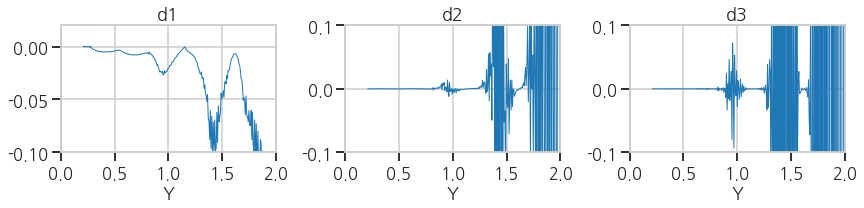

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 3), sharex=True)
ax[0].plot(df['Y'].iloc[:-1], d1, lw=1)
ax[1].plot(df['Y'].iloc[:-2], d2, lw=1)
ax[2].plot(df['Y'].iloc[:-3], d3, lw=1)

ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.1, 0.02))
ax[1].set_ylim((-0.1, 0.1))
ax[2].set_ylim((-0.1, 0.1))

ax[0].set_title('d1')
ax[1].set_title('d2')
ax[2].set_title('d3')

ax[0].set_xlabel('Y')
ax[1].set_xlabel('Y')
ax[2].set_xlabel('Y')

plt.tight_layout()
plt.savefig('6_pld_7.png')

### 3.5. Noise Reduction

#### 3.5.1. Algorithms Test

##### 3.5.1.1. Averaging and Median

In [10]:
from scipy import ndimage

def average(raw, box_size):
    box = np.ones(box_size)/box_size
    raw_smooth = np.convolve(box, raw, mode='same')
    return raw_smooth

def median(raw, box_size):
    raw_smooth = ndimage.median_filter(raw, box_size)
    return raw_smooth

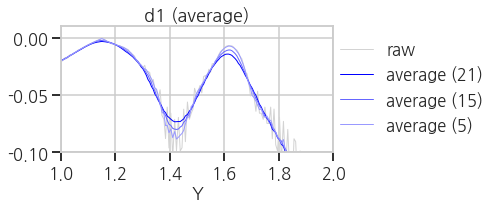

In [11]:
### averaging
d1_avg21 = average(d1, 21)
d1_avg15 = average(d1, 15)
d1_avg05 = average(d1, 5)


fig, ax = plt.subplots(ncols=1, figsize=(7, 3))
ax.plot(df['Y'].iloc[:-1], d1, lw=1, c='lightgray', label='raw')
ax.plot(df['Y'].iloc[:-1], d1_avg21, lw=1, c='#0000FF', label='average (21)')
ax.plot(df['Y'].iloc[:-1], d1_avg15, lw=1, c='#6666FF', label='average (15)')
ax.plot(df['Y'].iloc[:-1], d1_avg05, lw=1, c='#9999FF', label='average (5)')

ax.set_xlim((1, 2))
ax.set_ylim((-0.1, 0.01))

ax.set_title('d1 (average)')
ax.set_xlabel('Y')

plt.legend(loc=[1, 0.1])
plt.tight_layout()
plt.savefig('6_pld_8.png')

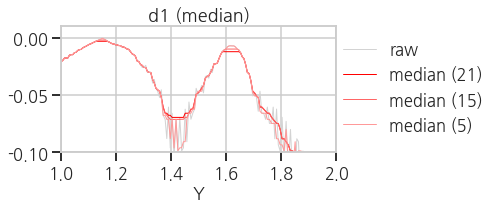

In [12]:
### averaging
d1_med21 = median(d1, 21)
d1_med15 = median(d1, 15)
d1_med05 = median(d1, 5)


fig, ax = plt.subplots(ncols=1, figsize=(7, 3))
ax.plot(df['Y'].iloc[:-1], d1, lw=1, c='lightgray', label='raw')
ax.plot(df['Y'].iloc[:-1], d1_med21, lw=1, c='#FF0000', label='median (21)')
ax.plot(df['Y'].iloc[:-1], d1_med15, lw=1, c='#FF6666', label='median (15)')
ax.plot(df['Y'].iloc[:-1], d1_med05, lw=1, c='#FF9999', label='median (5)')

ax.set_xlim((1, 2))
ax.set_ylim((-0.1, 0.01))

ax.set_title('d1 (median)')
ax.set_xlabel('Y')

plt.legend(loc=[1, 0.1])
plt.tight_layout()
plt.savefig('6_pld_9.png')

##### 3.5.1.2. numpy smoothing options (hanning, hamming, bartlett, blackman)

In [13]:
# https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html

def hanning(raw, box_size):
    box = np.hanning(box_size)/np.sum(np.hanning(box_size))
    raw_smooth = np.convolve(box, raw, mode='same')
    return raw_smooth

def hamming(raw, box_size):
    box = np.hanning(box_size)/np.sum(np.hanning(box_size))
    raw_smooth = np.convolve(box, raw, mode='same')
    return raw_smooth

def bartlett(raw, box_size):
    box = np.hanning(box_size)/np.sum(np.hanning(box_size))
    raw_smooth = np.convolve(box, raw, mode='same')
    return raw_smooth

def blackman(raw, box_size):
    box = np.hanning(box_size)/np.sum(np.hanning(box_size))
    raw_smooth = np.convolve(box, raw, mode='same')
    return raw_smooth

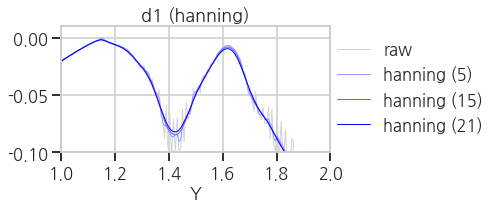

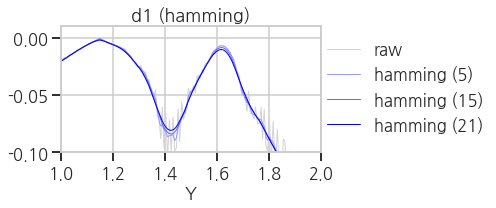

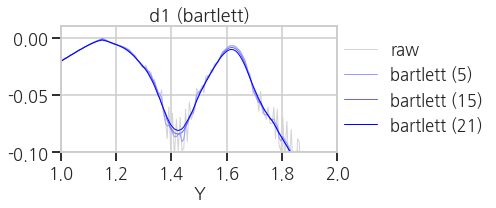

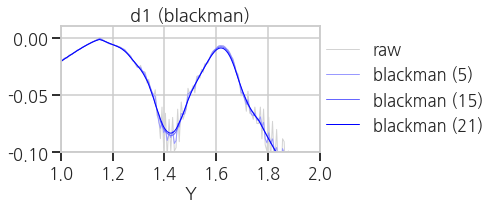

In [14]:
### methods
methods = ['hanning', 'hamming', 'bartlett', 'blackman']

def np_smooth(raw, method, box_size):
    w=eval(f'np.{method}(box_size)')
    raw_smooth = np.convolve(w/w.sum(), raw, mode='same')
    return raw_smooth

for method in methods:
    fig, ax = plt.subplots(ncols=1, figsize=(7, 3))
    ax.plot(df['Y'].iloc[:-1], d1, lw=1, c='lightgray', label='raw')
    ax.plot(df['Y'].iloc[:-1], np_smooth(d1, method, 5), lw=1, c='#9999FF', label=f'{method} (5)')
    ax.plot(df['Y'].iloc[:-1], np_smooth(d1, method, 15), lw=1, c='#6666FF', label=f'{method} (15)')
    ax.plot(df['Y'].iloc[:-1], np_smooth(d1, method, 21), lw=1, c='#0000FF', label=f'{method} (21)')

    ax.set_xlim((1, 2))
    ax.set_ylim((-0.1, 0.01))

    ax.set_title(f'd1 ({method})')
    ax.set_xlabel('Y')

    plt.legend(loc=[1, 0.1])
    plt.tight_layout()
    plt.savefig(f'6_pld_10_{method}.png')

##### 3.5.1.3. Savitzky–Golay filter

In [15]:
from scipy.signal import savgol_filter as sg

def savgol(raw, box_size):
    raw_smooth = sg(raw, box_size, 2, mode='nearest')
    return raw_smooth

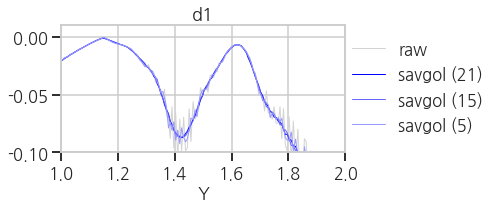

In [27]:
d1_sg21 = savgol(d1, 21)
d1_sg15 = savgol(d1, 15)
d1_sg05 = savgol(d1, 5)


fig, ax = plt.subplots(ncols=1, figsize=(7, 3))
ax.plot(df['Y'].iloc[:-1], d1, lw=1, c='lightgray', label='raw')
ax.plot(df['Y'].iloc[:-1], d1_sg21, lw=1, c='#0000FF', label='savgol (21)')
ax.plot(df['Y'].iloc[:-1], d1_sg15, lw=1, c='#6666FF', label='savgol (15)')
ax.plot(df['Y'].iloc[:-1], d1_sg05, lw=1, c='#9999FF', label='savgol (5)')

ax.set_xlim((1, 2))
ax.set_ylim((-0.1, 0.01))

ax.set_title('d1')
ax.set_xlabel('Y')

plt.legend(loc=[1, 0.1])
plt.tight_layout()
plt.savefig('6_pld_10_sg.png')

#### 3.5.2. Apply Savitzky-Golay filter

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:1273: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


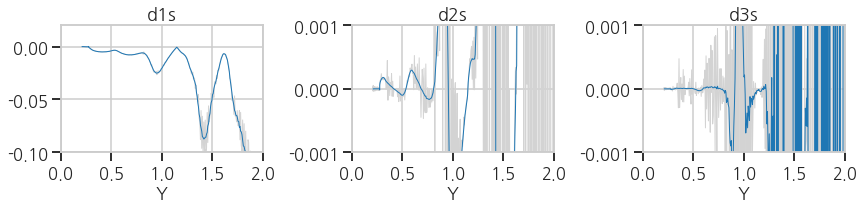

In [17]:
# Smoothing
d1s = savgol(d1, 15)
d2s_0 = np.diff(d1s)/np.diff(df['X'].iloc[:-1])
d2s = savgol(d2s_0, 15)
d3s_0 = np.diff(d2s_0)/np.diff(df['X'].iloc[:-2])
d3s = savgol(d3s_0, 15)

# Visualization
fig, ax = plt.subplots(ncols=3, figsize=(12, 3), sharex=True)
ax[0].plot(df['Y'].iloc[:-1], d1, lw=1, c='lightgray')
ax[1].plot(df['Y'].iloc[:-2], d2, lw=1, c='lightgray')
ax[2].plot(df['Y'].iloc[:-3], d3, lw=1, c='lightgray')

ax[0].plot(df['Y'].iloc[:-1], d1s, lw=1)
ax[1].plot(df['Y'].iloc[:-2], d2s, lw=1)
ax[2].plot(df['Y'].iloc[:-3], d3s, lw=1)

ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.1, 0.02))
ax[1].set_ylim((-0.001, 0.001))
ax[2].set_ylim((-0.001, 0.001))

ax[0].set_title('d1s')
ax[1].set_title('d2s')
ax[2].set_title('d3s')

ax[0].set_xlabel('Y')
ax[1].set_xlabel('Y')
ax[2].set_xlabel('Y')

plt.tight_layout()
plt.savefig('6_pld_11.png')

#### 3.5.3. Refine Data Quality
* To reduce noise from the raw data level

In [18]:
print(f'data size (raw)={df.shape[0]}')
df_xu = df.groupby(df['X']).nth(0).reset_index()
print(f'data size (refined)={df_xu.shape[0]}')

data size (raw)=490
data size (refined)=430


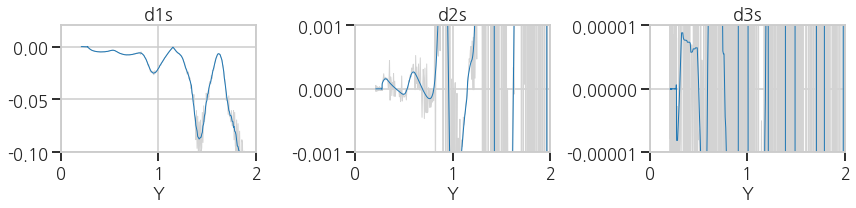

In [19]:
# Smoothing
d1s_0 = np.diff(df_xu['Y'])/np.diff(df_xu['X'])
d1s = savgol(d1s_0, 15)
d2s_0 = np.diff(d1s)/np.diff(df_xu['X'].iloc[:-1])
d2s = median(average(savgol(d2s_0, 15), 9), 3)
d3s_0 = np.diff(d2s_0)/np.diff(df_xu['X'].iloc[:-2])
d3s = median(average(savgol(d3s_0, 15), 3), 5)

# Visualization
fig, ax = plt.subplots(ncols=3, figsize=(12, 3), sharex=True)
ax[0].plot(df['Y'].iloc[:-1], d1, lw=1, c='lightgray')
ax[1].plot(df['Y'].iloc[:-2], d2, lw=1, c='lightgray')
ax[2].plot(df['Y'].iloc[:-3], d3, lw=1, c='lightgray')

ax[0].plot(df_xu['Y'].iloc[:-1], d1s, lw=1)
ax[1].plot(df_xu['Y'].iloc[:-2], d2s, lw=1)
ax[2].plot(df_xu['Y'].iloc[:-3], d3s, lw=1)

ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.1, 0.02))
ax[1].set_ylim((-0.001, 0.001))
ax[2].set_ylim((-1e-5, 1e-5))

ax[0].set_title('d1s')
ax[1].set_title('d2s')
ax[2].set_title('d3s')

ax[0].set_xlabel('Y')
ax[1].set_xlabel('Y')
ax[2].set_xlabel('Y')

plt.tight_layout()
plt.savefig('6_pld_12.png')

### 3.6. Plateau Detection
* with better expression on data using LaTeX

#### 3.6.1. Data Screening for Plateau Detection

In [20]:
# font setting for LaTeX

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.default'] = 'it'

font_title = {'fontsize': 30,
              'fontweight' : plt.rcParams['axes.titleweight'],
              'verticalalignment': 'center',
              'horizontalalignment': 'center'}

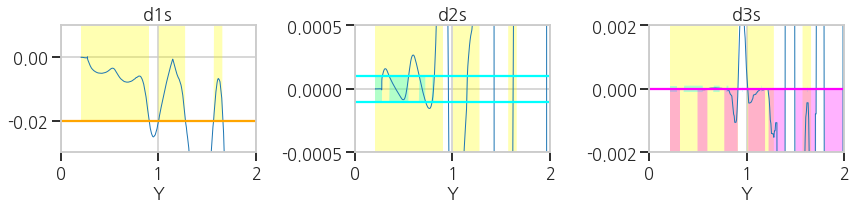

In [21]:
d1tol=0.02
d2tol=1e-4
d3tol=5e-6

# 1. Visualization: Line
fig, ax = plt.subplots(ncols=3, figsize=(12, 3), sharex=True)

#- 1st derivative
ax[0].plot(df_xu['Y'].iloc[:-1], d1s, lw=1, zorder=2)
ax[0].axhline(y=d1tol, c='orange')
ax[0].axhline(y=-d1tol, c='orange')
ax[0].fill_between(df_xu['Y'].iloc[:-1], -d1tol, d1tol, 
                          where=abs(d1s) <= d1tol,
                          facecolor='yellow', interpolate=True, alpha=0.3)
ax[1].fill_between(df_xu['Y'].iloc[:-1], -d1tol, d1tol, 
                          where=abs(d1s) <= d1tol,
                          facecolor='yellow', interpolate=True, alpha=0.3)
ax[2].fill_between(df_xu['Y'].iloc[:-1], -d1tol, d1tol, 
                          where=abs(d1s) <= d1tol,
                          facecolor='yellow', interpolate=True, alpha=0.3)

#- 2nd derivative
ax[1].plot(df_xu['Y'].iloc[:-2], d2s, lw=1, zorder=2)
ax[1].axhline(y=-d2tol, c='cyan')
ax[1].axhline(y=d2tol, c='cyan')
ax[1].fill_between(df_xu['Y'].iloc[:-2], -d2tol, d2tol, 
                          where=abs(d2s) <= d2tol,
                          facecolor='cyan', interpolate=True, alpha=0.3)
ax[2].fill_between(df_xu['Y'].iloc[:-2], -d2tol, d2tol, 
                          where=abs(d2s) <= d2tol,
                          facecolor='cyan', interpolate=True, alpha=0.3)

#- 3rd derivative
ax[2].plot(df_xu['Y'].iloc[:-3], d3s, lw=1, zorder=2)
ax[2].axhline(y=d3tol, c='magenta')
ax[2].fill_between(df_xu['Y'].iloc[:-3], -100, d3tol, 
                          where=d3s <= d3tol,
                          facecolor='magenta', interpolate=True, alpha=0.3)


ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.03, 0.01))
ax[1].set_ylim((-0.0005, 0.0005))
ax[2].set_ylim((-0.002, 0.002))

ax[0].set_title('d1s')
ax[1].set_title('d2s')
ax[2].set_title('d3s')

ax[0].set_xlabel('Y')
ax[1].set_xlabel('Y')
ax[2].set_xlabel('Y')

plt.tight_layout()
plt.savefig('6_pld_13.png')

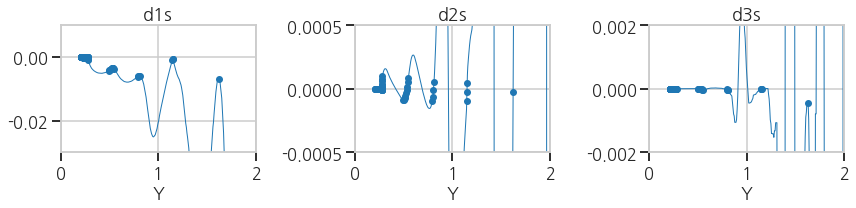

In [28]:
# 2. Find Plateau
screen1 = np.where(abs(d1s) < d1tol)[0]
screen2 = np.where(abs(d2s) < d2tol)[0]
screen3 = np.where(d3s <= d3tol)[0]

plateau = np.array([i for i in screen1 if i in screen2 and i in screen3])

# Visualization: Plateau
fig, ax = plt.subplots(ncols=3, figsize=(12, 3), sharex=True)

ax[0].plot(df_xu['Y'].iloc[:-1], d1s, lw=1, zorder=2)
ax[1].plot(df_xu['Y'].iloc[:-2], d2s, lw=1, zorder=2)
ax[2].plot(df_xu['Y'].iloc[:-3], d3s, lw=1, zorder=2)

ax[0].scatter(df_xu['Y'].iloc[plateau], d1s[plateau], s=30)
ax[1].scatter(df_xu['Y'].iloc[plateau], d2s[plateau], s=30)
ax[2].scatter(df_xu['Y'].iloc[plateau], d3s[plateau], s=30)

ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.03, 0.01))
ax[1].set_ylim((-0.0005, 0.0005))
ax[2].set_ylim((-0.002, 0.002))

ax[0].set_title('d1s')
ax[1].set_title('d2s')
ax[2].set_title('d3s')

ax[0].set_xlabel('Y')
ax[1].set_xlabel('Y')
ax[2].set_xlabel('Y')

plt.tight_layout()
plt.savefig('6_pld_14.png')

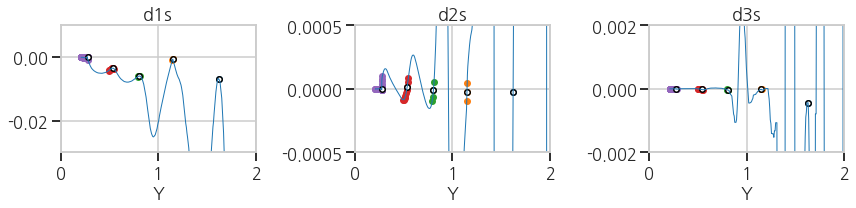

In [23]:
# 4. Clustering and Phase Transition Points
from sklearn.cluster import DBSCAN

eps=3e-2
min_samples=1

pl = np.array(df_xu['Y'].iloc[plateau]).reshape((-1,1))
clusters = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1).fit(pl)
ncluster = len(np.unique(clusters.labels_))

phase_trs = []
for cluster in range(ncluster):
    cl_idx = plateau[clusters.labels_ == cluster][0]
    phase_tr = cl_idx + abs(d1s[plateau][clusters.labels_ == cluster]).argmin()
    phase_trs.append(phase_tr)

phase_trs = np.array(phase_trs)
    
# Visualization: clusters
fig, ax = plt.subplots(ncols=3, figsize=(12, 3), sharex=True)

ax[0].plot(df_xu['Y'].iloc[:-1], d1s, lw=1, zorder=2)
ax[1].plot(df_xu['Y'].iloc[:-2], d2s, lw=1, zorder=2)
ax[2].plot(df_xu['Y'].iloc[:-3], d3s, lw=1, zorder=2)

for cluster in range(ncluster):
    cl_idx = plateau[clusters.labels_ == cluster]
    
    # clusters
    ax[0].scatter(df_xu['Y'].iloc[cl_idx], d1s[cl_idx], s=30)
    ax[1].scatter(df_xu['Y'].iloc[cl_idx], d2s[cl_idx], s=30)
    ax[2].scatter(df_xu['Y'].iloc[cl_idx], d3s[cl_idx], s=30)
    
    # phase transition points
    ph_idx = phase_trs[cluster]
    ax[0].scatter(df_xu['Y'].iloc[ph_idx], d1s[ph_idx], s=30, c='w', ec='k')
    ax[1].scatter(df_xu['Y'].iloc[ph_idx], d2s[ph_idx], s=30, c='w', ec='k')
    ax[2].scatter(df_xu['Y'].iloc[ph_idx], d3s[ph_idx], s=30, c='w', ec='k')
    
ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.03, 0.01))
ax[1].set_ylim((-0.0005, 0.0005))
ax[2].set_ylim((-0.002, 0.002))

ax[0].set_title('d1s')
ax[1].set_title('d2s')
ax[2].set_title('d3s')

ax[0].set_xlabel('Y')
ax[1].set_xlabel('Y')
ax[2].set_xlabel('Y')

plt.tight_layout()
plt.savefig('6_pld_15.png')    

#### 3.6.2. Better Title with LaTeX

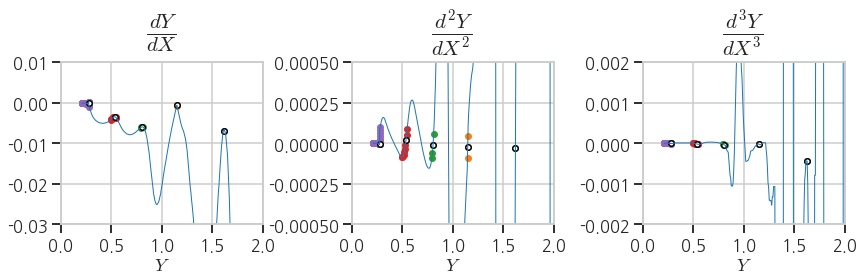

In [24]:
# Visualization: clusters (same as before, except for LaTeX expression)
fig, ax = plt.subplots(ncols=3, figsize=(12, 4), sharex=True)

ax[0].plot(df_xu['Y'].iloc[:-1], d1s, lw=1, zorder=2)
ax[1].plot(df_xu['Y'].iloc[:-2], d2s, lw=1, zorder=2)
ax[2].plot(df_xu['Y'].iloc[:-3], d3s, lw=1, zorder=2)

for cluster in range(ncluster):
   
    # clusters
    cl_idx = plateau[clusters.labels_ == cluster]
    ax[0].scatter(df_xu['Y'].iloc[cl_idx], d1s[cl_idx], s=30)
    ax[1].scatter(df_xu['Y'].iloc[cl_idx], d2s[cl_idx], s=30)
    ax[2].scatter(df_xu['Y'].iloc[cl_idx], d3s[cl_idx], s=30)
    
    # phase transition points
    ph_idx = phase_trs[cluster]
    ax[0].scatter(df_xu['Y'].iloc[ph_idx], d1s[ph_idx], s=30, c='w', ec='k')
    ax[1].scatter(df_xu['Y'].iloc[ph_idx], d2s[ph_idx], s=30, c='w', ec='k')
    ax[2].scatter(df_xu['Y'].iloc[ph_idx], d3s[ph_idx], s=30, c='w', ec='k')
    
ax[0].set_xlim((0, 2))
ax[0].set_ylim((-0.03, 0.01))
ax[1].set_ylim((-0.0005, 0.0005))
ax[2].set_ylim((-0.002, 0.002))

ax[0].set_title(r'$ \mathit{\frac{dY}{dX}} $', fontdict=font_title, pad=30)
ax[1].set_title(r'$ \mathit{\frac{d^2Y}{dX^2}} $', fontdict=font_title, pad=30)
ax[2].set_title(r'$ \mathit{\frac{d^3Y}{dX^3}} $', fontdict=font_title, pad=30)

ax[0].set_xlabel(r'$ Y $')
ax[1].set_xlabel(r'$ Y $')
ax[2].set_xlabel(r'$ Y $')

plt.tight_layout()
plt.savefig('6_pld_16.png') 

### 3.7. Visualization on X-Y Curve with Summary file

#### 3.7.1 Visualization

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


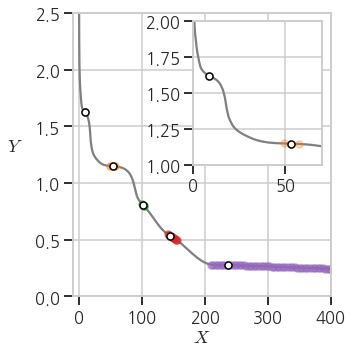

In [31]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(figsize=(5,5))
axin = inset_axes(ax, width=1.8, height=2)

ax.plot(df_xu['X'], df_xu['Y'], c='gray', zorder=1)
axin.plot(df_xu['X'], df_xu['Y'], c='gray', zorder=1)

for cluster in range(ncluster):
    # clusters
    cl_idx = plateau[clusters.labels_ == cluster]
    ax.scatter(df_xu['X'].iloc[cl_idx], df_xu['Y'].iloc[cl_idx], s=50, c=f'C{cluster}', alpha=0.5, zorder=2)
    axin.scatter(df_xu['X'].iloc[cl_idx], df_xu['Y'].iloc[cl_idx], s=50, alpha=0.3, zorder=2)
    
    # phase transition points
    ph_idx = phase_trs[cluster]
    ax.scatter(df_xu['X'].iloc[ph_idx], df_xu['Y'].iloc[ph_idx], s=50, c='w', ec='k', zorder=2)
    axin.scatter(df_xu['X'].iloc[ph_idx], df_xu['Y'].iloc[ph_idx], s=50, c='w', ec='k', zorder=2)

ax.set_xlim((-10, 400))    
ax.set_ylim((0, 2.5))    
ax.set_xlabel(r'$ X $')
ax.set_ylabel(r'$ Y $', rotation=0, labelpad=20)

axin.set_xlim((0, 70))    
axin.set_ylim((1, 2))    

plt.tight_layout()
plt.savefig('6_pld_17.png')

#### 3.7.2 Summary to .csv

In [30]:
d = {'trX': df_xu['X'].iloc[phase_trs], 
     'trY': df_xu['X'].iloc[phase_trs]}
summary = pd.DataFrame(data = d).reset_index(drop=True)
summary.to_csv('6_pld_summary.csv')

summary

,trX,trY
0,8.842574,8.842574
1,53.258390,53.258390
2,101.926762,101.926762
3,144.587501,144.587501
4,237.603825,237.603825
